# Notebook for Unregularized Logistic Regression-2023 - NB#323 - May 2023#

In [4]:
# You may omit this section if required, as this section is not directly related to the title.
# File Location: The file we want to access is currently placed in the current working directory of Python.
# If you don’t know the current working directory of Python, you can use the following code to obtain the
# infromation on current working directory:

import os

current_directory = os.getcwd()

print(current_directory)

#If required following command could change the current_directory any directory after deleting the #
#%cd "F:\StudentCopies"

/content


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data_path = '/content/ex2data1.txt'
data = pd.read_csv(data_path, header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


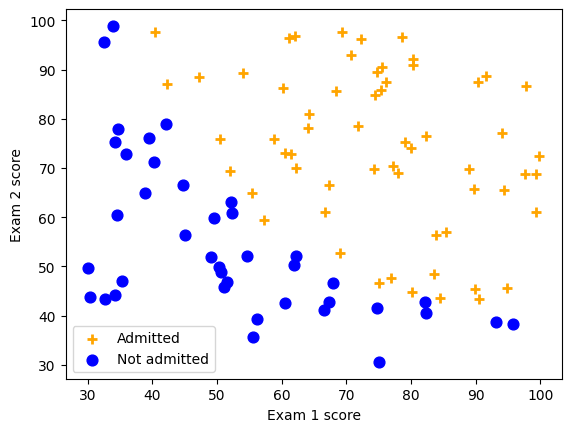

In [7]:
neg = data['y'] == 0
pos = data['y'] == 1
plt.scatter(data[pos]['x1'],data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label = "Admitted")
plt.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label = "Not admitted" )
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='best')
plt.show()

In [8]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
# insert 1's (x_0)
X = np.insert(X, 0, 1, axis=1)
y = y.values

In [9]:
### Sigmoid function

def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [10]:
### Hypothesis and cost function

m = X.shape[0]
def Cost(theta, X, y):
    h = sigmoid(X.dot(theta))
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))

    if np.isnan(J.item()):
        return(np.inf)
    return(J.item())

In [11]:
theta_initial = np.zeros(X.shape[1]).reshape(-1,1)
Cost(theta_initial,X,y)

0.6931471805599453

In [12]:
def gradient(theta, X, y):
    h = sigmoid(X.dot(theta))

    grad =(1/m)*X.T.dot(h-y)

    return grad

In [13]:
theta_initial = np.zeros(X.shape[1]).reshape(-1,1)
cost = Cost(theta_initial, X, y)
grad = gradient(theta_initial, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599453
Grad: 
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [14]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)

    for iter in np.arange(num_iters):

        theta = theta - alpha*gradient(theta,X,y)
        J_history[iter] = Cost(theta,X,y)
    return(theta, J_history)

In [15]:
theta_initial = np.zeros(X.shape[1]).reshape(-1,1)
alpha = 0.005
iterations = 200000
theta, cost_history = gradientDescent(X,y,theta_initial,alpha,iterations)

In [16]:
theta

array([[-29.86969031],
       [  0.23309162],
       [  0.2264146 ]])

(0.0, 200000.0)

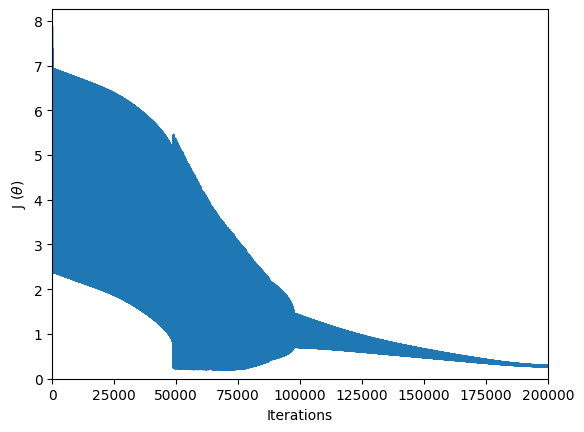

In [17]:
plt.plot(cost_history)
plt.ylabel('J' + ' (' + r'$\theta$' +')')
# or plt.ylabel('J' + ' (\u0398)' )
plt.xlabel('Iterations')
plt.ylim(ymin = 0)
plt.xlim(0,iterations)

In [18]:
## Optimization (using Scipy)
import scipy.optimize as sp
theta_opt = sp.fmin( Cost, x0=theta_initial, args=(X, y), maxiter=500, full_output=True)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [19]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [20]:
theta_opt = theta_opt[0]
theta_opt

array([-25.16130062,   0.20623142,   0.20147143])

In [21]:
sigmoid(np.array([1, 45, 85]).dot(theta_opt.T))

np.float64(0.7762915904112413)

In [22]:
p = predict(theta_opt, X)
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


In [23]:
###### Using theta obtained from gradient descent
def predict1(theta1, X, threshold=0.5):
    p1 = sigmoid(X.dot(theta1)) >= threshold
    return(p1.astype('int'))

In [24]:
p1 = predict1(theta,X)
print('Train accuracy {}%'.format(100*sum(p1.ravel() == y.ravel())/p1.size))

Train accuracy 86.0%


In [25]:
#### sklearn
from sklearn import linear_model
reg = linear_model.LogisticRegression()
reg.fit (X[:,[1,2]],y.ravel());

In [26]:
from sklearn.metrics import accuracy_score
y_pred = reg.predict(X[:,[1,2]])
print('Train accuracy: ' + str(100*accuracy_score(y_pred,y))+'%')

Train accuracy: 89.0%


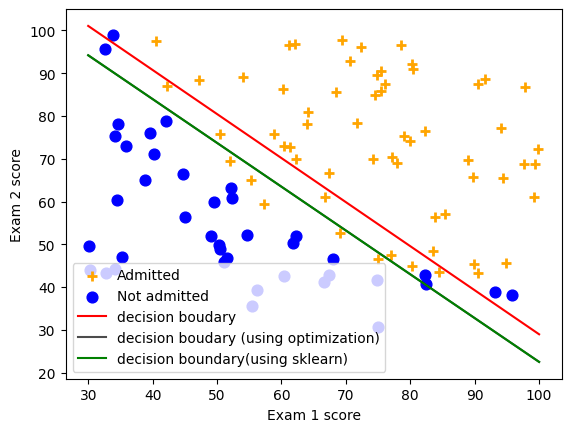

In [27]:
## Decision boundary
neg = data['y'] == 0
pos = data['y'] == 1
plt.scatter(data[pos]['x1'],data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label = "Admitted")
plt.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label = "Not admitted" )

xx = np.linspace(30,100,100)
yy = (-1./theta[2])*(theta[0] + theta[1]*xx)
plt.plot(xx,yy,color='r',label='decision boudary')


yy_opt = (-1./theta_opt[2])*(theta_opt[0] + theta_opt[1]*xx)
plt.plot(xx,yy_opt,color='k',label='decision boudary (using optimization)',alpha=0.7)

coef = reg.coef_
intercept = reg.intercept_
ex2 = -(coef[:, 0] * xx + intercept.item()) / coef[:,1]
plt.plot(xx,ex2,color='g',label='decision boundary(using sklearn)')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='best')
plt.show()

<ipython-input-28-2441084419>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = h(xx1[i,j],xx2[i,j])


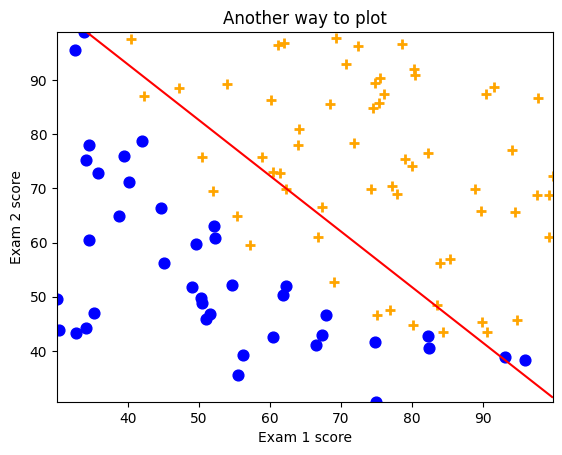

In [28]:
### Alternate way to plot decision boundary (using contour)
x1_min, x1_max = data['x1'].min(), data['x1'].max(),
x2_min, x2_max = data['x2'].min(), data['x2'].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

B0 = np.linspace(x1_min,x1_max)
B1 = np.linspace(x2_min,x2_max)
#xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

def h(x1,x2):
    stacked = np.hstack((x1,x2))
    a = np.insert(stacked,0,1)
    return a.dot(theta)

for i in range (B0.size):
    for j in range(B1.size):
        Z[i,j] = h(xx1[i,j],xx2[i,j])

plt.contour(xx1,xx2,Z,[0.5],colors='r')

neg = data['y'] == 0
pos = data['y'] == 1
plt.scatter(data[pos]['x1'],data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label = "Admitted")
plt.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label = "Not admitted" )

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Another way to plot')
plt.show()

# Thank You and Enjoy with Numrous Coding Variations..